In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./ames_housing_train.csv', index_col='Id')
data.shape

(1460, 80)

# Target

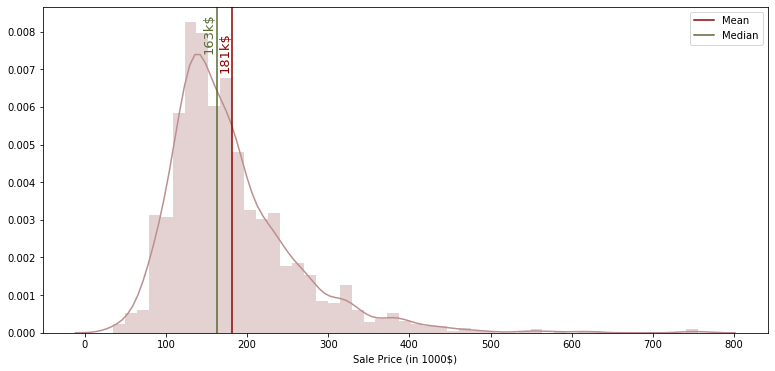

In [3]:
plt.figure(figsize=(13,6))

sns.distplot(data["SalePrice"]/1000, color = 'rosybrown')
plt.xlabel("Sale Price (in 1000$)")

mean = data['SalePrice'].mean()/1000
median = data['SalePrice'].median()/1000

plt.axvline(mean, color = 'darkred', label = 'Mean')
plt.axvline(median, color = 'darkolivegreen', label = 'Median')
plt.text(165,0.0070, "{}k$".format(round(mean)), color = 'darkred', rotation = 90, size = 13)
plt.text(145,0.0075, "{}k$".format(round(median)), color = 'darkolivegreen', rotation = 90, size = 13)
plt.legend()

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. Hence, we plot the logarithm of the 'SalePrice' and set it to be our target.

Text(0.5, 0, 'Log(Sale Price) in $')

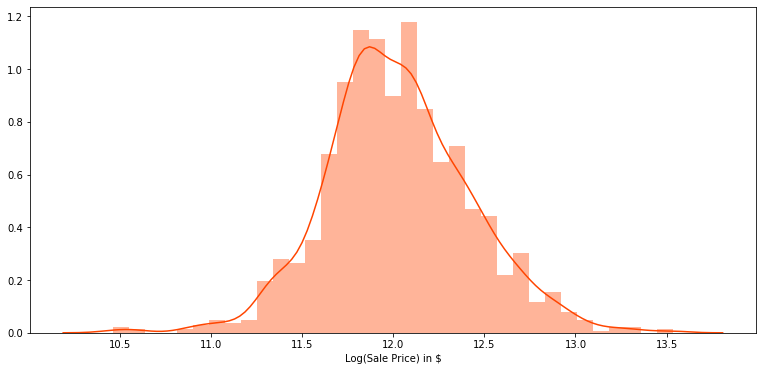

In [4]:
plt.figure(figsize=(13,6))

sns.distplot(np.log(data["SalePrice"]), color = 'orangered')
plt.xlabel("Log(Sale Price) in $")

# Missing Values
**Here our goal is to identify columns with missing values and get a sense of how much data is missing from our dataset**

In [5]:
# How much missing data do we have?
total = data.isnull().sum().sort_values(ascending=False)
percent = round((100*data.isnull().sum()/data.isnull().count()).sort_values(ascending=False),1)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '% Missing'])
missing_data.head(20)

,Total,% Missing
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageCond,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


### We want to (we can so why not) visualize the counts of values in columns, where we have mising values. In the graphs below, the counts of NaNs are always shown first

## Categorical Values

In [6]:
cat_cols = [cname for cname in data.columns if data[cname].dtype == "object"]
cat_with_nans = [cname for cname in data.columns if data[cname].dtype == "object" and data[cname].isnull().any()]
print('there are', len(cat_with_nans), 'columns with missing categorical data:', cat_with_nans)

there are 16 columns with missing categorical data: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [7]:
data['AgeGarage'] = data['YrSold'] - data['GarageYrBlt']
data['AgeGarage'].value_counts()

1.0      87
0.0      84
4.0      45
2.0      35
5.0      34
3.0      34
31.0     31
6.0      31
8.0      30
10.0     27
9.0      27
7.0      26
32.0     25
11.0     25
42.0     24
30.0     23
53.0     22
51.0     22
44.0     22
37.0     22
47.0     21
41.0     20
12.0     20
39.0     20
49.0     20
15.0     20
14.0     19
48.0     18
20.0     17
16.0     17
         ..
74.0      5
62.0      5
61.0      5
86.0      5
89.0      4
77.0      4
72.0      4
73.0      3
87.0      3
65.0      3
90.0      3
78.0      3
82.0      3
92.0      3
85.0      2
93.0      2
75.0      2
80.0      2
64.0      2
99.0      1
96.0      1
94.0      1
71.0      1
76.0      1
102.0     1
100.0     1
95.0      1
107.0     1
97.0      1
91.0      1
Name: AgeGarage, Length: 101, dtype: int64

In [8]:
# so that we see something in the plots
data[cat_cols] = data[cat_cols].fillna("MISS")

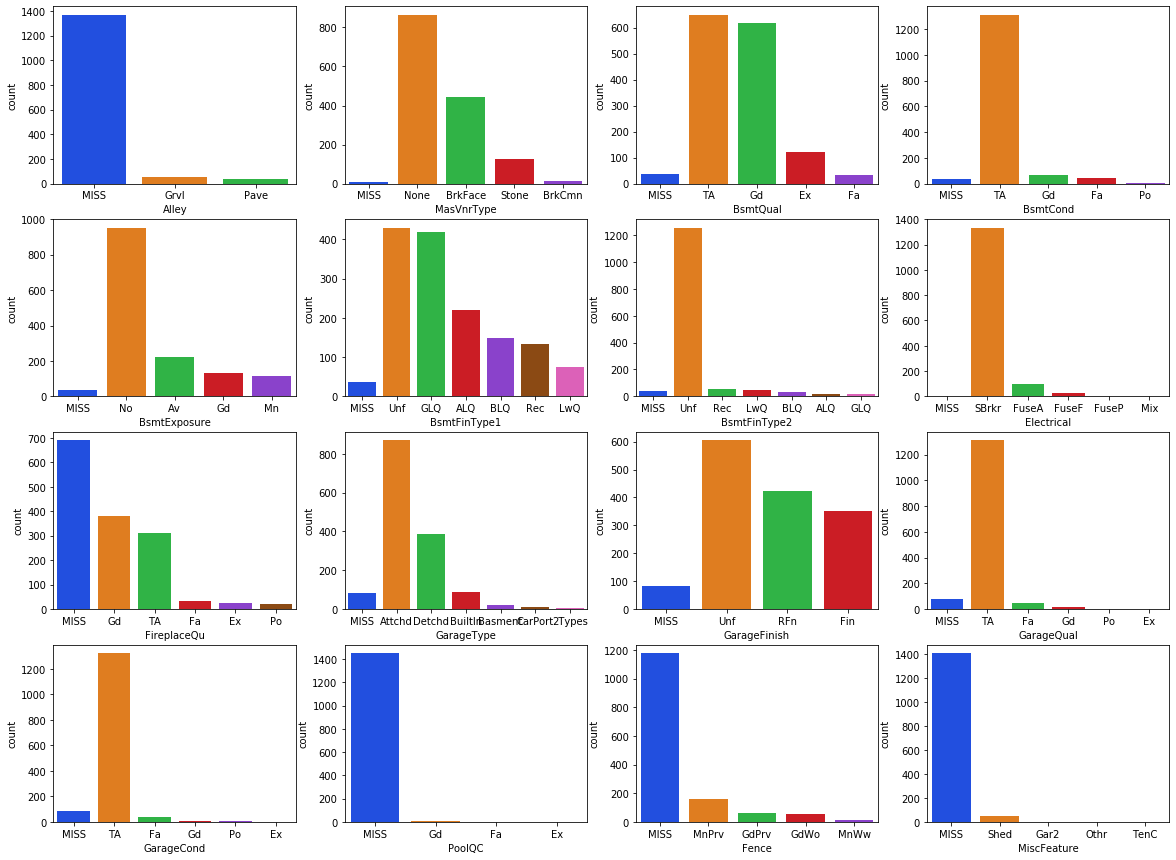

In [9]:
f, ax = plt.subplots(4, 4, figsize=(20, 15))
       
for i in range(4):
    for j in range(4):
        sns.countplot(data[cat_with_nans[j+4*i]], ax=ax[i,j], palette = "bright", 
                      order = data[cat_with_nans[j+4*i]].value_counts().index.drop("MISS").insert(0, 'MISS'))
        sns.countplot(data[cat_with_nans[j+4*i]], ax=ax[i,j], palette = "bright", 
                      order = data[cat_with_nans[j+4*i]].value_counts().index.drop("MISS").insert(0, 'MISS'))
plt.show()

## Numerical Values

#### We want to get the names of columns with numerical data and find out which of these columns contain NaN values.

In [10]:
num_cols = [cname for cname in data.columns if data[cname].dtype == "float64" or data[cname].dtype == "int64"]
num_with_nans = [cname for cname in num_cols if data[cname].isnull().any()]
print('there are', len(num_with_nans), 'columns with missing numerical data:', num_with_nans)

there are 4 columns with missing numerical data: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'AgeGarage']


In [11]:
# Replace all numerical values with "Values" and all NaN values with "Miss"
data.LotFrontage.where(data.LotFrontage.isnull(), "Value", inplace=True)
data.MasVnrArea.where(data.MasVnrArea.isnull(), "Value", inplace=True)
data.GarageYrBlt.where(data.GarageYrBlt.isnull(), "Value", inplace=True)
data[num_with_nans] = data[num_with_nans].fillna("MISS")

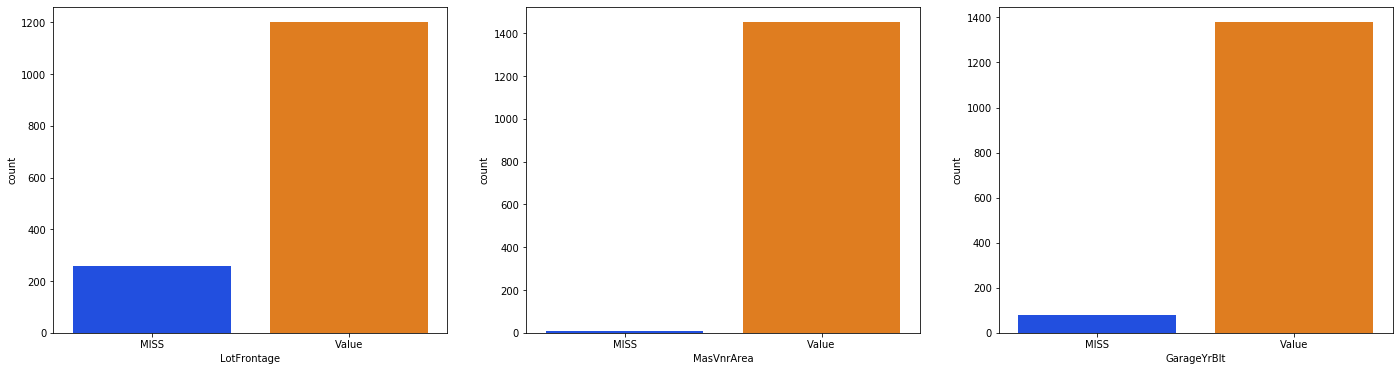

In [12]:
f, ax = plt.subplots(1, 3, figsize=(24, 6))
       
for j in range(3):
    sns.countplot(data[num_with_nans[j]], ax=ax[j], palette = "bright", 
                  order = data[num_with_nans[j]].value_counts().index.drop("MISS").insert(0, 'MISS'))
plt.show()

# Dealing with Missing Values

**In all of the graphs below we will be observing correlations between different features and a column named "SalePrice", which is our target. We have 79 features and it is impossible to make a vis for each find to find if the correlations exist or if it could be dropped, but we can focus on some. It maked sense to look at features with missing data and decide if it is reasonable to drop it or to impute values. We will go in order of most missing values in column to least.** LotFrontage

In [13]:
# we load the dataset again to get back the original values (with NaNs)
data = pd.read_csv('./ames_housing_train.csv', index_col='Id') 

In column 'pool quality', NaN means "No Pool", but since 99.5% of data is missing, it is better to simply drop the feature and not use it to train the model.

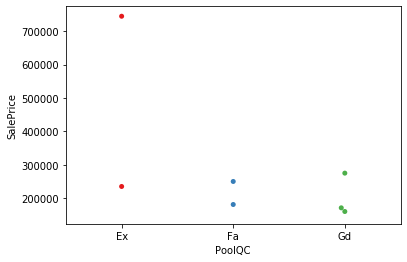

In [14]:
sns.swarmplot(x='PoolQC', y='SalePrice', data=data, palette='Set1')

We have a lot of missing values in column "Miscellaneous Feature", namely 96.3% and we do not now exactly which features the correspond to, as well as have to little data for features like "Tennis Court" and "2nd garage", it is better to just drop the feature from the dataset.

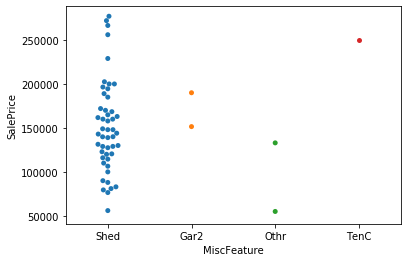

In [15]:
sns.swarmplot(x=data['MiscFeature'], y=data['SalePrice'])

Here we see that the price of a house with a paved alley is slightly higher. But since missing data accounts for 93.8% of all entries in this column, in further analysis we would just drop this feature from the training set.

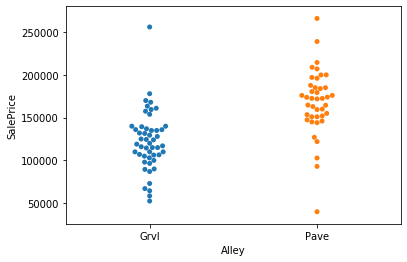

In [16]:
sns.swarmplot(x=data['Alley'], y=data['SalePrice'])

Here, NaN values mean "No Fence" and we replace NaNs with this value. We order the x axis as "Good Privacy", "Minimum Privacy", "Good Wood", "Minimum Wood/Wire", "No Fence". We see that the price of a house with good privacy is slightly higher.

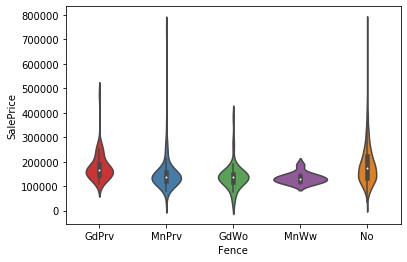

In [17]:
data['Fence'].fillna("No", inplace = True)
sns.violinplot(x='Fence', y='SalePrice', data=data, palette='Set1', order = ["GdPrv", "MnPrv", "GdWo", "MnWw", "No"])

In column "FireplaceQu" (Fireplace Quality) we have 47.3% of entries missing. However, here the missing values mean that there is no fireplace in the house, so we can replace NaN with entry "No". The x axis of above graph has been ordered as "Excellent", "Good", "Average", "Fair", "Poor", "No". This makes perfect sense, houses with no or poor quality fireplaces cost less than houses with an excellent ones. Later, it is a good idea not to one-hot encode these values but to replace them with an actual ranking going from 0 (No) to 5 (Excellent).

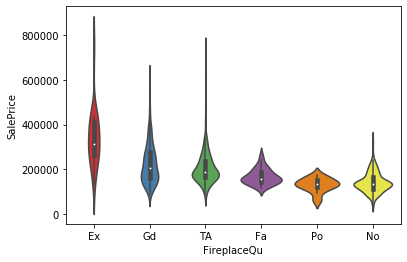

In [18]:
data['FireplaceQu'].fillna("No", inplace = True)
sns.violinplot(x='FireplaceQu',y='SalePrice',data=data,palette='Set1', order = ["Ex", "Gd", "TA", "Fa", "Po", "No"])

#### Garages
We have 81 values missing in all columns, which indicate garages. By checking the data description it becomes clear, that we have missing values, because some of the houses don't have any garages. So we replace NaNs in some columns with "No".

'GarageCars' and 'GarageArea' also refer to the same thing, namely the garage capacity. When we compare the plots we see that it is true, so we only keep one of the features.

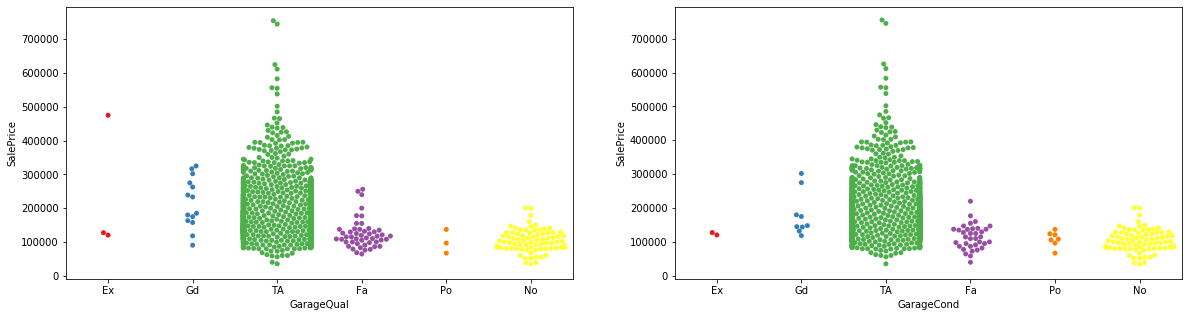

In [19]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

data['GarageQual'].fillna("No", inplace = True)
data['GarageCond'].fillna("No", inplace = True)
sns.swarmplot(x='GarageQual',y='SalePrice',data=data, palette='Set1', 
              order = ['Ex', "Gd", 'TA', 'Fa', 'Po', 'No'], ax = ax[0])
sns.swarmplot(x='GarageCond',y='SalePrice',data=data, palette='Set1', 
              order = ['Ex', "Gd", 'TA', 'Fa', 'Po', 'No'], ax = ax[1])

As we see below, there is a positive correlation between the year a garage was bulit and the price of the house. We will perplace the NaN values in this column with the median.
We keep the columns 'GarageType' and 'GarageFinish' but replace NaNs with "No"s.

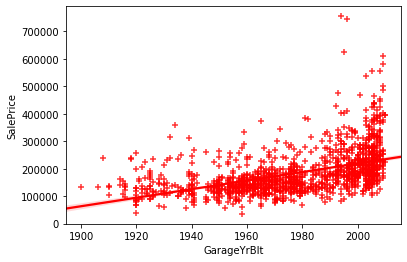

In [20]:
sns.regplot(x=data['GarageYrBlt'], y=data['SalePrice'], color = 'red', marker = "+")

#### Basement

We also have some features for Basement, which have missing values. Here it also means that the property has no basement, so we replace NaNs with "No"s.

#### Veneer
Here, in 'MasVnrType' we see that we have "None" values along with 8 NaNs. Could it mean the same thing? We can check that. We would expect all "None"-type veneers to have an area of 0. As we can see below, this is not entirely true, which I don't have an answer for. It might be just an imput error. Still, it seems most reasonable to replace NaNs in 'MasVnrType' with "None" and NaNs in 'MasVnrArea' with 0s.

0.0      859
1.0        2
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64


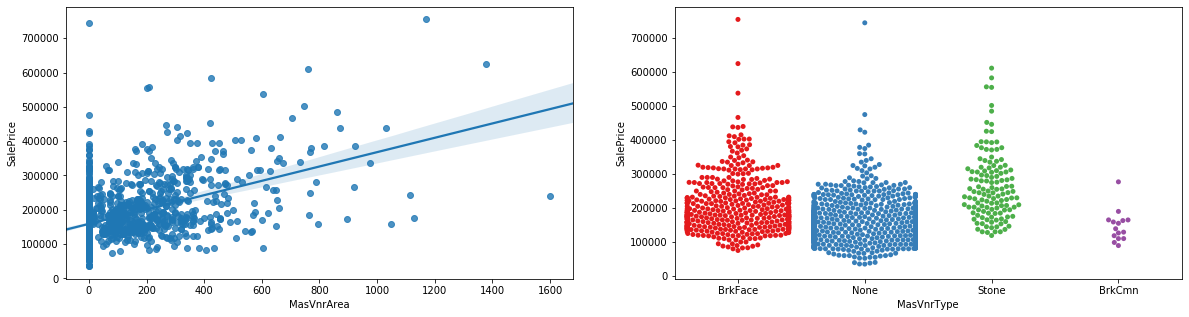

In [21]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.regplot(x=data['MasVnrArea'], y=data['SalePrice'], ax = ax[0])
sns.swarmplot(x='MasVnrType',y='SalePrice',data=data, palette='Set1', ax = ax[1])

indicies = data.index[data['MasVnrType'] == 'None']
print(data.loc[indicies]['MasVnrArea'].value_counts())

data['MasVnrType'].fillna("None", inplace = True)
data['MasVnrArea'].fillna(0, inplace = True)

The only feature with missing values, which we havent discussed yet is 'LotFrontage', linear feet of street connected to property. Since it doesn't make sense that a house has no linear feet of street connected to it, we will impute the median. We also see a few outliers, where the houses with more than 300 linear feet connected to it are far less expensive than those with, say 100 feet. We will replace these two values with the median as well.

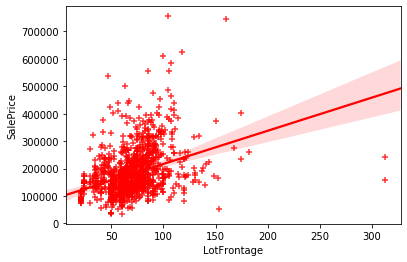

In [22]:
sns.regplot(x=data['LotFrontage'], y=data['SalePrice'], color = 'red', marker = "+")

## Relevant Features

"Irrelevant or partially relevant features can negatively impact model performance". So it is our job to filter them out.
Since we are going to work with XGBoost, we will select important features based on this algorithm. At this point, i cannot say, if we will get better preformance on the test set using only 10-20 important features or if we need to use all the features, but I'll guess we'll see. 

All the categorical values will be one-hot enco **but wait, cardinality!**

oopsie, almost forgot about that. We don't want our dataset to become unnecessarily large, so let's only keep the columns, where the cardinality is less than 10.

In [23]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

It is interesting to see what the data looks like. We see that 'Exterior1st' and 'Exterior2nd'(exterior covering on house) does not seem like a good indicator for the price of the house so we can drop the feature.

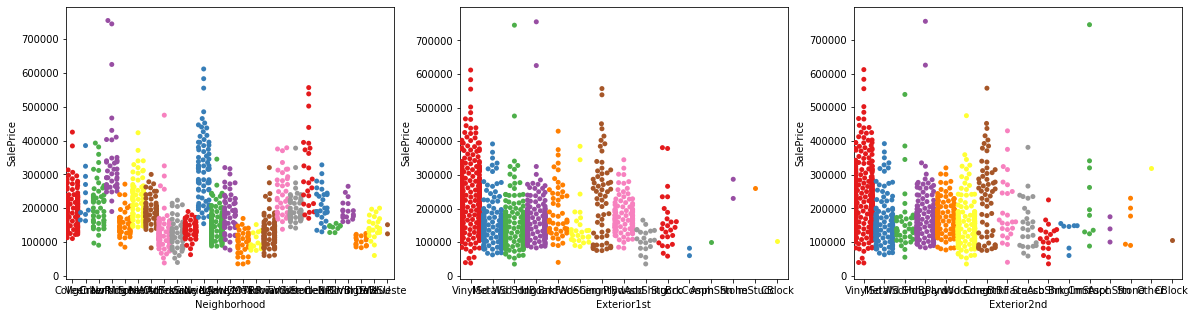

In [24]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))

high_cardinality_cols = [cname for cname in data.columns if data[cname].nunique() >= 10 and 
                        data[cname].dtype == "object"]

# it doesn't make much sense to decipher the x-axis so we won't bother
for i in range(len(high_cardinality_cols)):
    sns.swarmplot(x=high_cardinality_cols[i],y='SalePrice', data = data, palette='Set1', ax = ax[i])

However, the feature 'Neighborhood' has a high cardinality and we will be keeping it, since there is a strong correlation to the Sale Price (which is also intuitive, some neighbourhoods are more expensive than others). This can be seen more clearly below.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

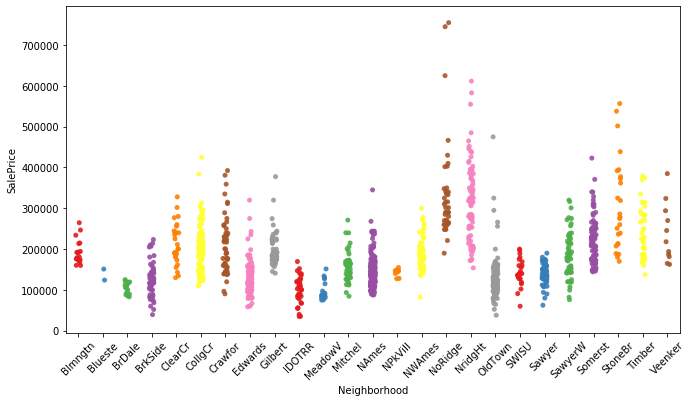

In [25]:
plt.figure(figsize=(11,6))
sns.stripplot(x = data.Neighborhood, y = data.SalePrice,
              order = np.sort(data.Neighborhood.unique()),
              jitter=0.1, alpha=0.9, palette='Set1')
 
plt.xticks(rotation=45)

A feature, that you come across looking at various analyses done by other users is 'LotArea'. We don't have any missing values there but we see outliers, where houses with huge Lot Areas are not getting more expensive. We will not remove entries with Lot Area >= 50000, but replace them with the median.

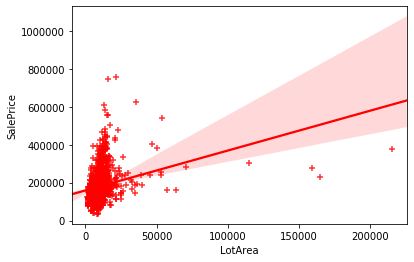

In [26]:
sns.regplot(x=data['LotArea'], y=data['SalePrice'], color = 'red', marker = "+")

There are houses with huge living areas and fairly low prices, as well as huge prices (4 houses with areas larger than 4000 square feet and prices ranging from almost 200k to more than 700k). We will replace these values with the median price of a house.

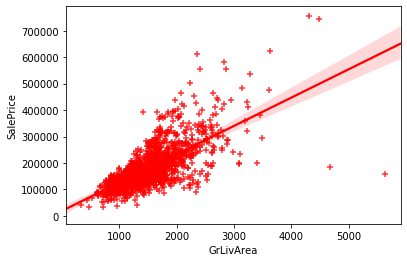

In [27]:
sns.regplot(x=data['GrLivArea'], y=data['SalePrice'], color = 'red', marker = "+")

We see below that most houses have gas heating, which is an sign, that the kind of heating system of the house doesn't influence the price much. We can remove this feature from the analysis.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

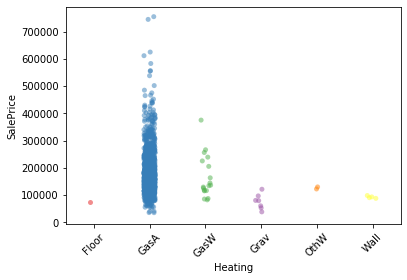

In [28]:
sns.stripplot(x = data.Heating, y = data.SalePrice,
              order = np.sort(data.Heating.unique()),
              jitter=0.1, alpha=0.5, palette='Set1')
 
plt.xticks(rotation=45)

In the end, we just scroll over feature description on https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data, and adjust a few things, like the category description (0 for poor, 5 for excellent for example).

### We can now proceed with modelling.